In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon,MultiPolygon,LineString,MultiLineString,LinearRing,Point
from shapely import symmetric_difference
import scipy
import time
import numpy as np
import random
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import osmnx as ox
import glob
from itertools import combinations,product
from copy import deepcopy
import os
from lib_contour_lines import *
from lib_merging import *
import mysql.connector


In [2]:

cnx = mysql.connector.connect(user='spirz', 
                              password='this_is_my_PASSWORD_m8',
                              host='localhost',
                              database='dem_from_contours_lines',
                              autocommit=True)
cursor = cnx.cursor(buffered=True,dictionary=True)
contours_lines_table_name='contours_lines'
2

2

In [3]:
level=250
t1=time.time()
level_open_contours_df=get_level_contours_df(cursor,level,is_closed=False)
crs=level_open_contours_df.estimate_utm_crs()
level_open_contours_df=level_open_contours_df.to_crs(crs)
t2=time.time()
print(t2-t1)
level_open_contours_df

3.681694984436035


,id,is_closed,elevation,geometry
id,,,,
1066,1066,0,250.0,"LINESTRING (528909.527 4728787.148, 528903.112..."
2108,2108,0,250.0,"LINESTRING (508155.708 4726052.319, 508158.364..."
2792,2792,0,250.0,"LINESTRING (508121.771 4725607.040, 508128.251..."
3774,3774,0,250.0,"LINESTRING (508142.302 4725876.417, 508144.752..."
6253,6253,0,250.0,"LINESTRING (507359.365 4715603.287, 507365.623..."
6795,6795,0,250.0,"LINESTRING (534867.205 4728331.650, 534884.697..."
7983,7983,0,250.0,"LINESTRING (531314.761 4728603.298, 531312.449..."
9826,9826,0,250.0,"LINESTRING (508095.626 4725263.999, 508108.768..."
11523,11523,0,250.0,"LINESTRING (469534.765 4693262.548, 469526.291..."


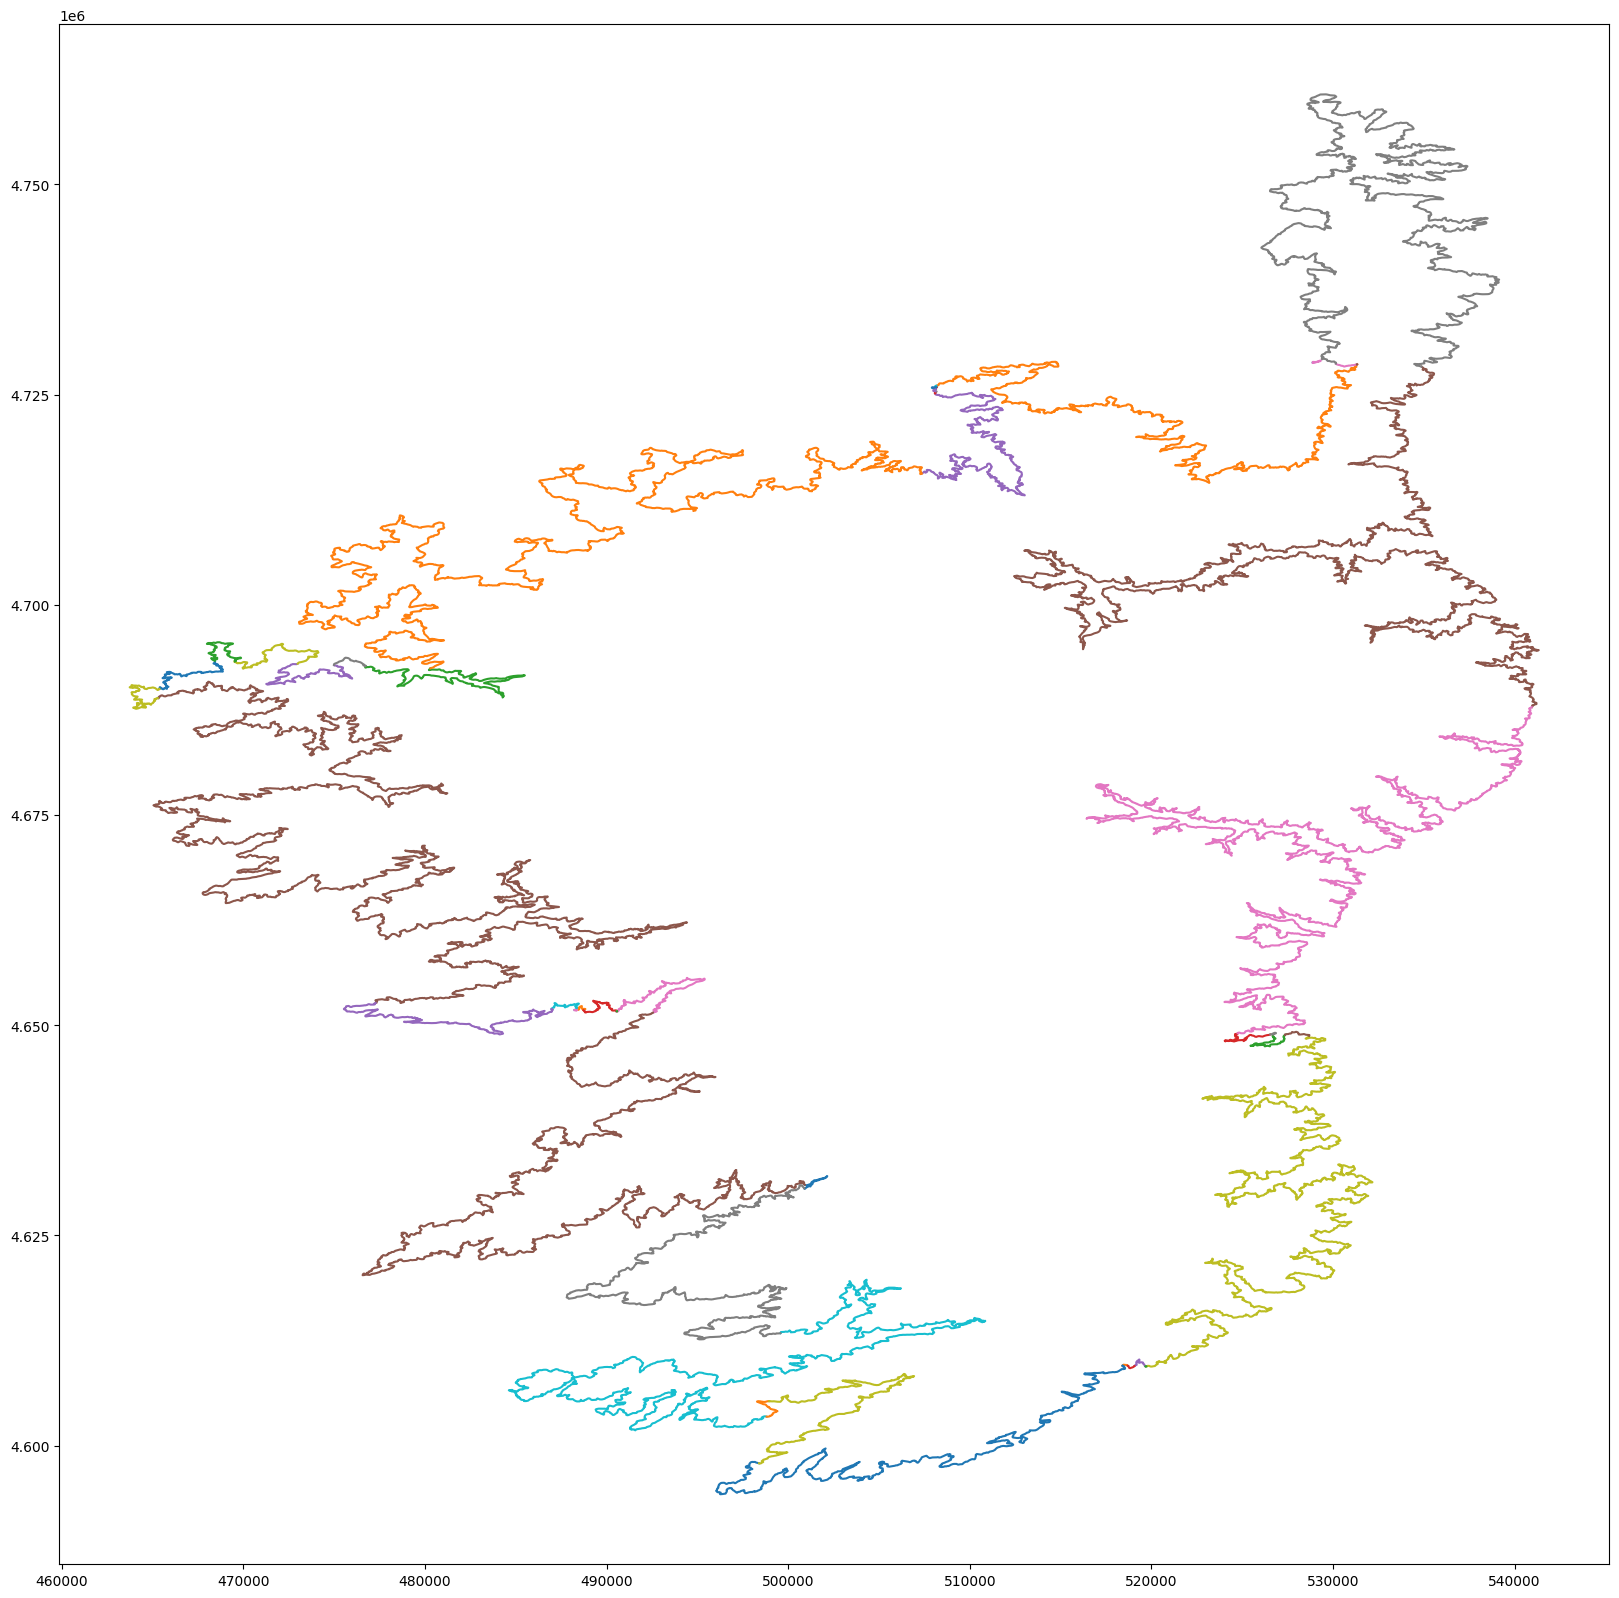

In [4]:
plt.rcParams['figure.figsize']=(20,20)

for ls in level_open_contours_df['geometry']:
    coords=np.array(ls.coords)
    plt.plot(coords[:,0],coords[:,1])


0.5144720077514648


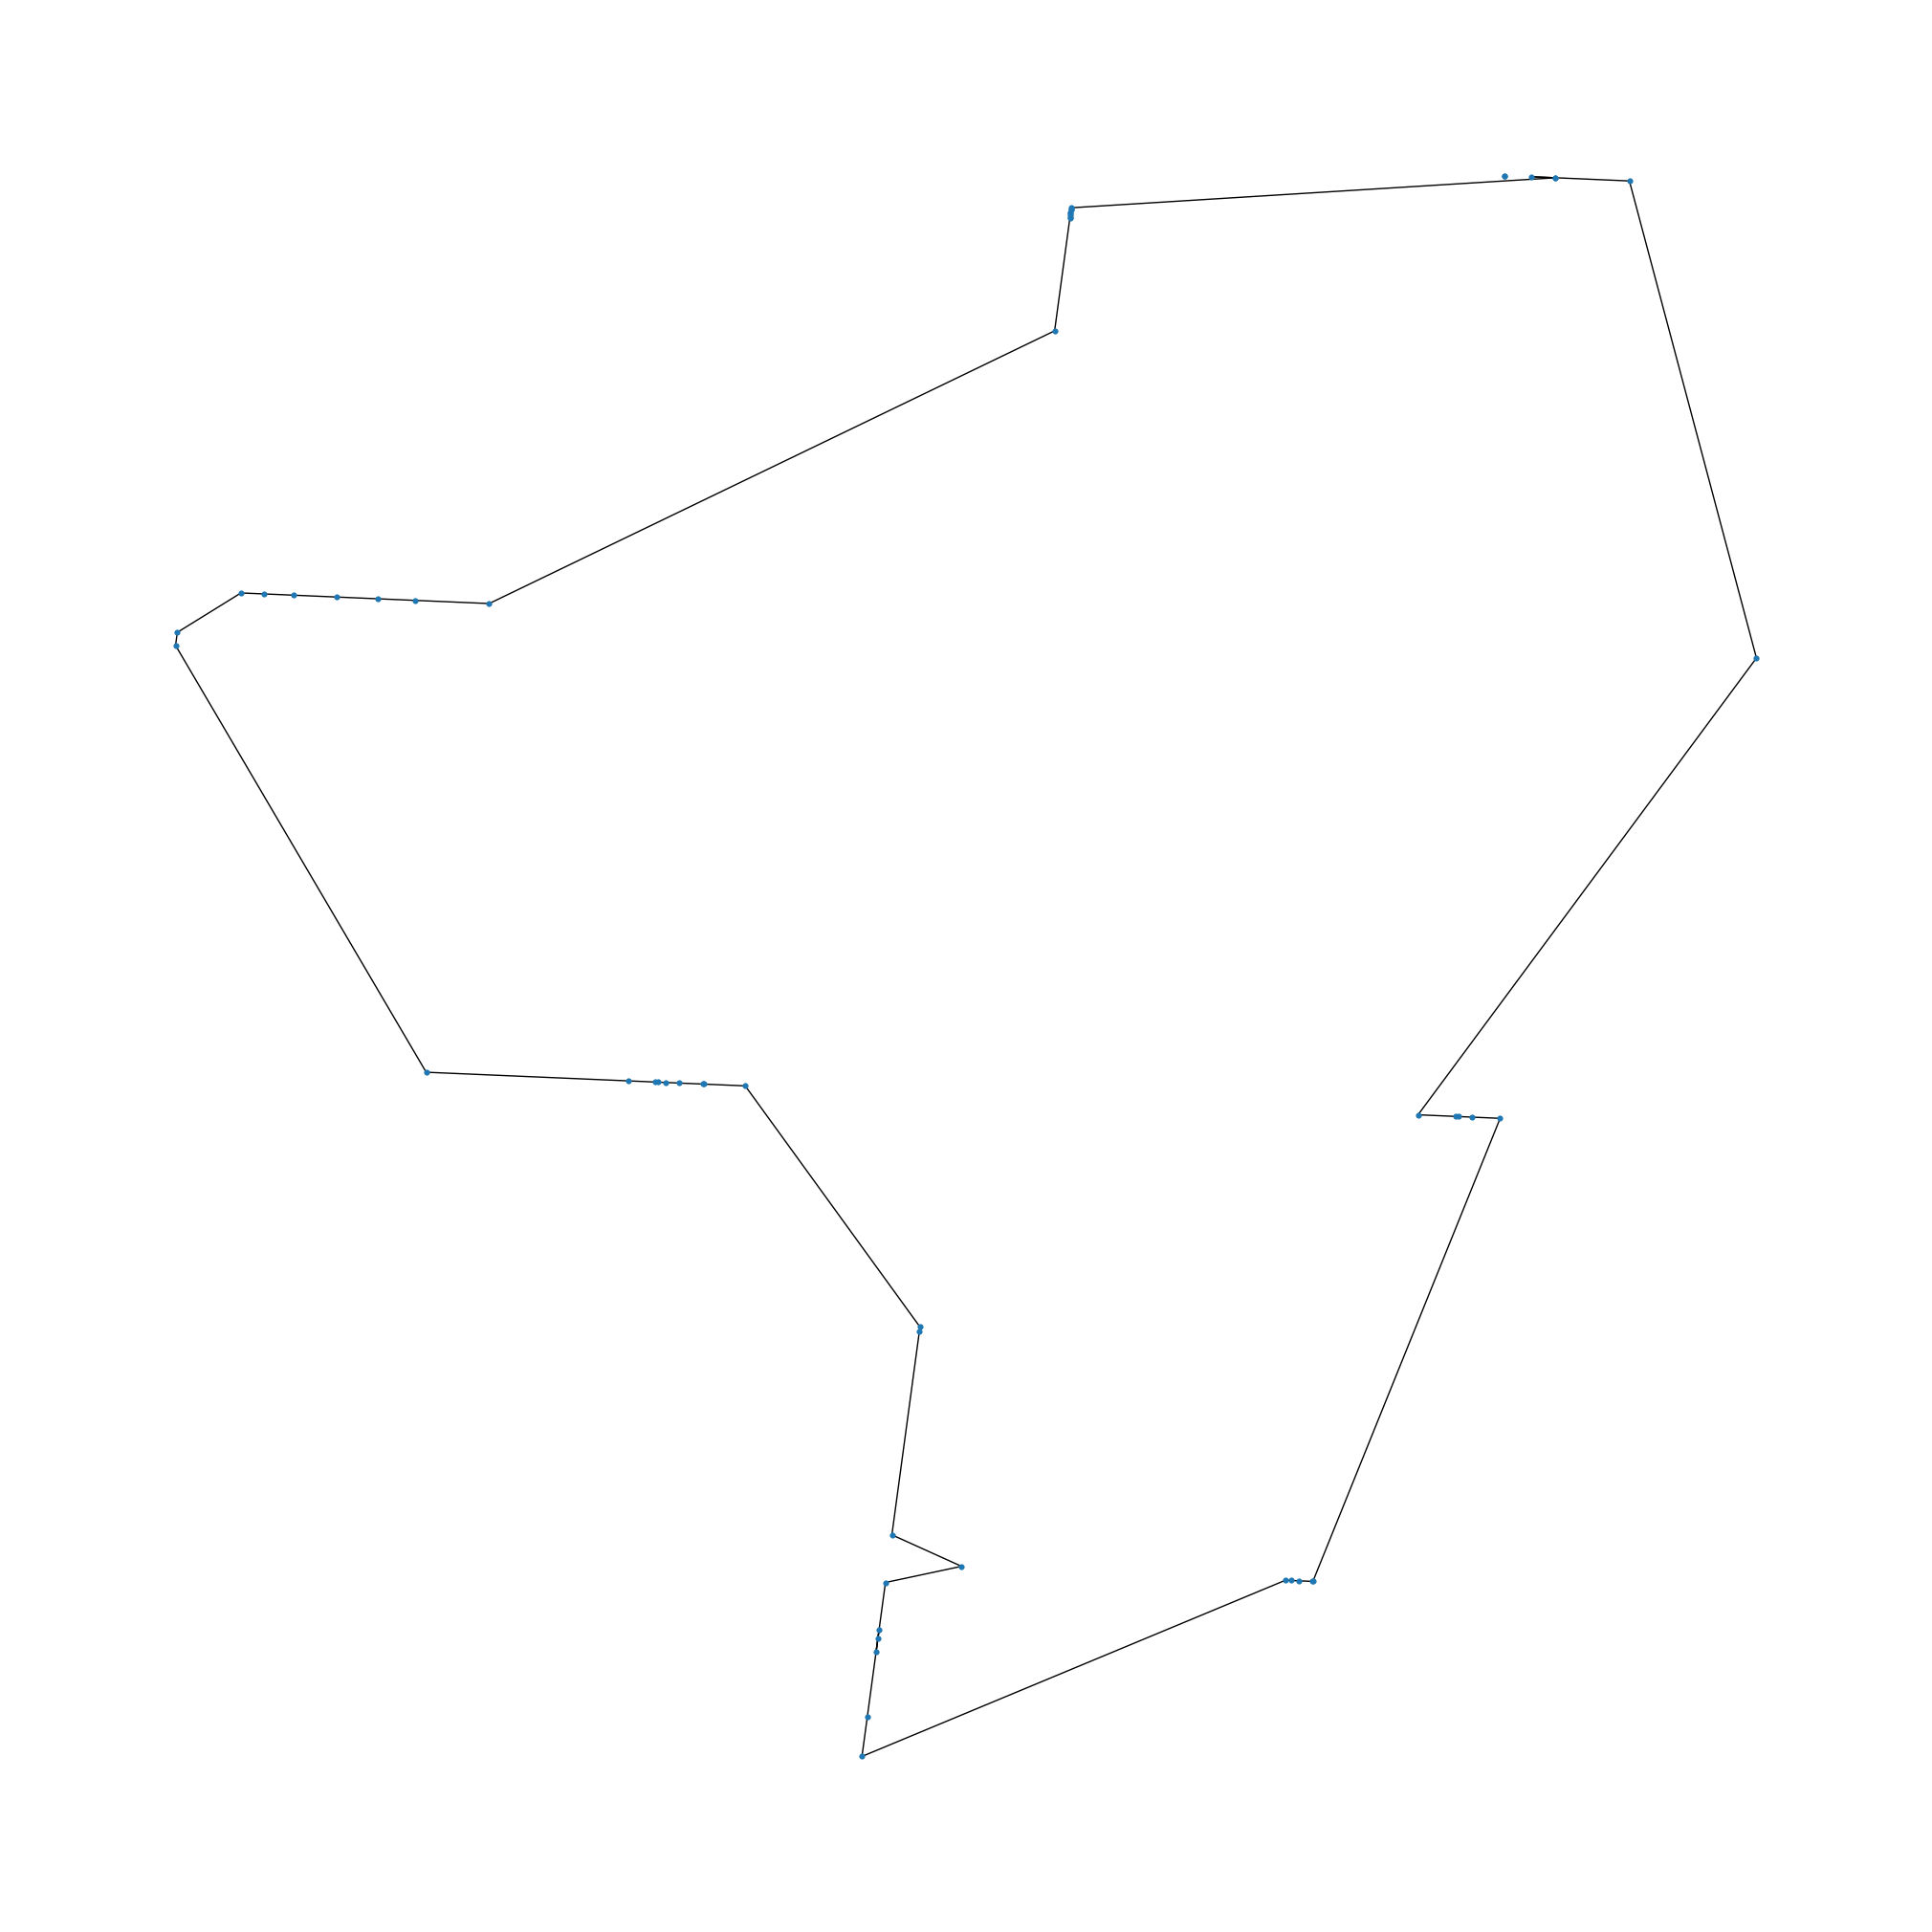

In [17]:
t1=time.time()
G_extremities=build_open_contour_graph(level_open_contours_df,max_distance=1)
t2=time.time()
print(t2-t1)
pos=pos={node:(data['x'],data['y']) for node,data in G_extremities.nodes(data=True)}
nx.draw(G_extremities,pos=pos,node_size=10)

In [16]:
len(list(nx.connected_components(G_extremities)))

54

0.021379709243774414


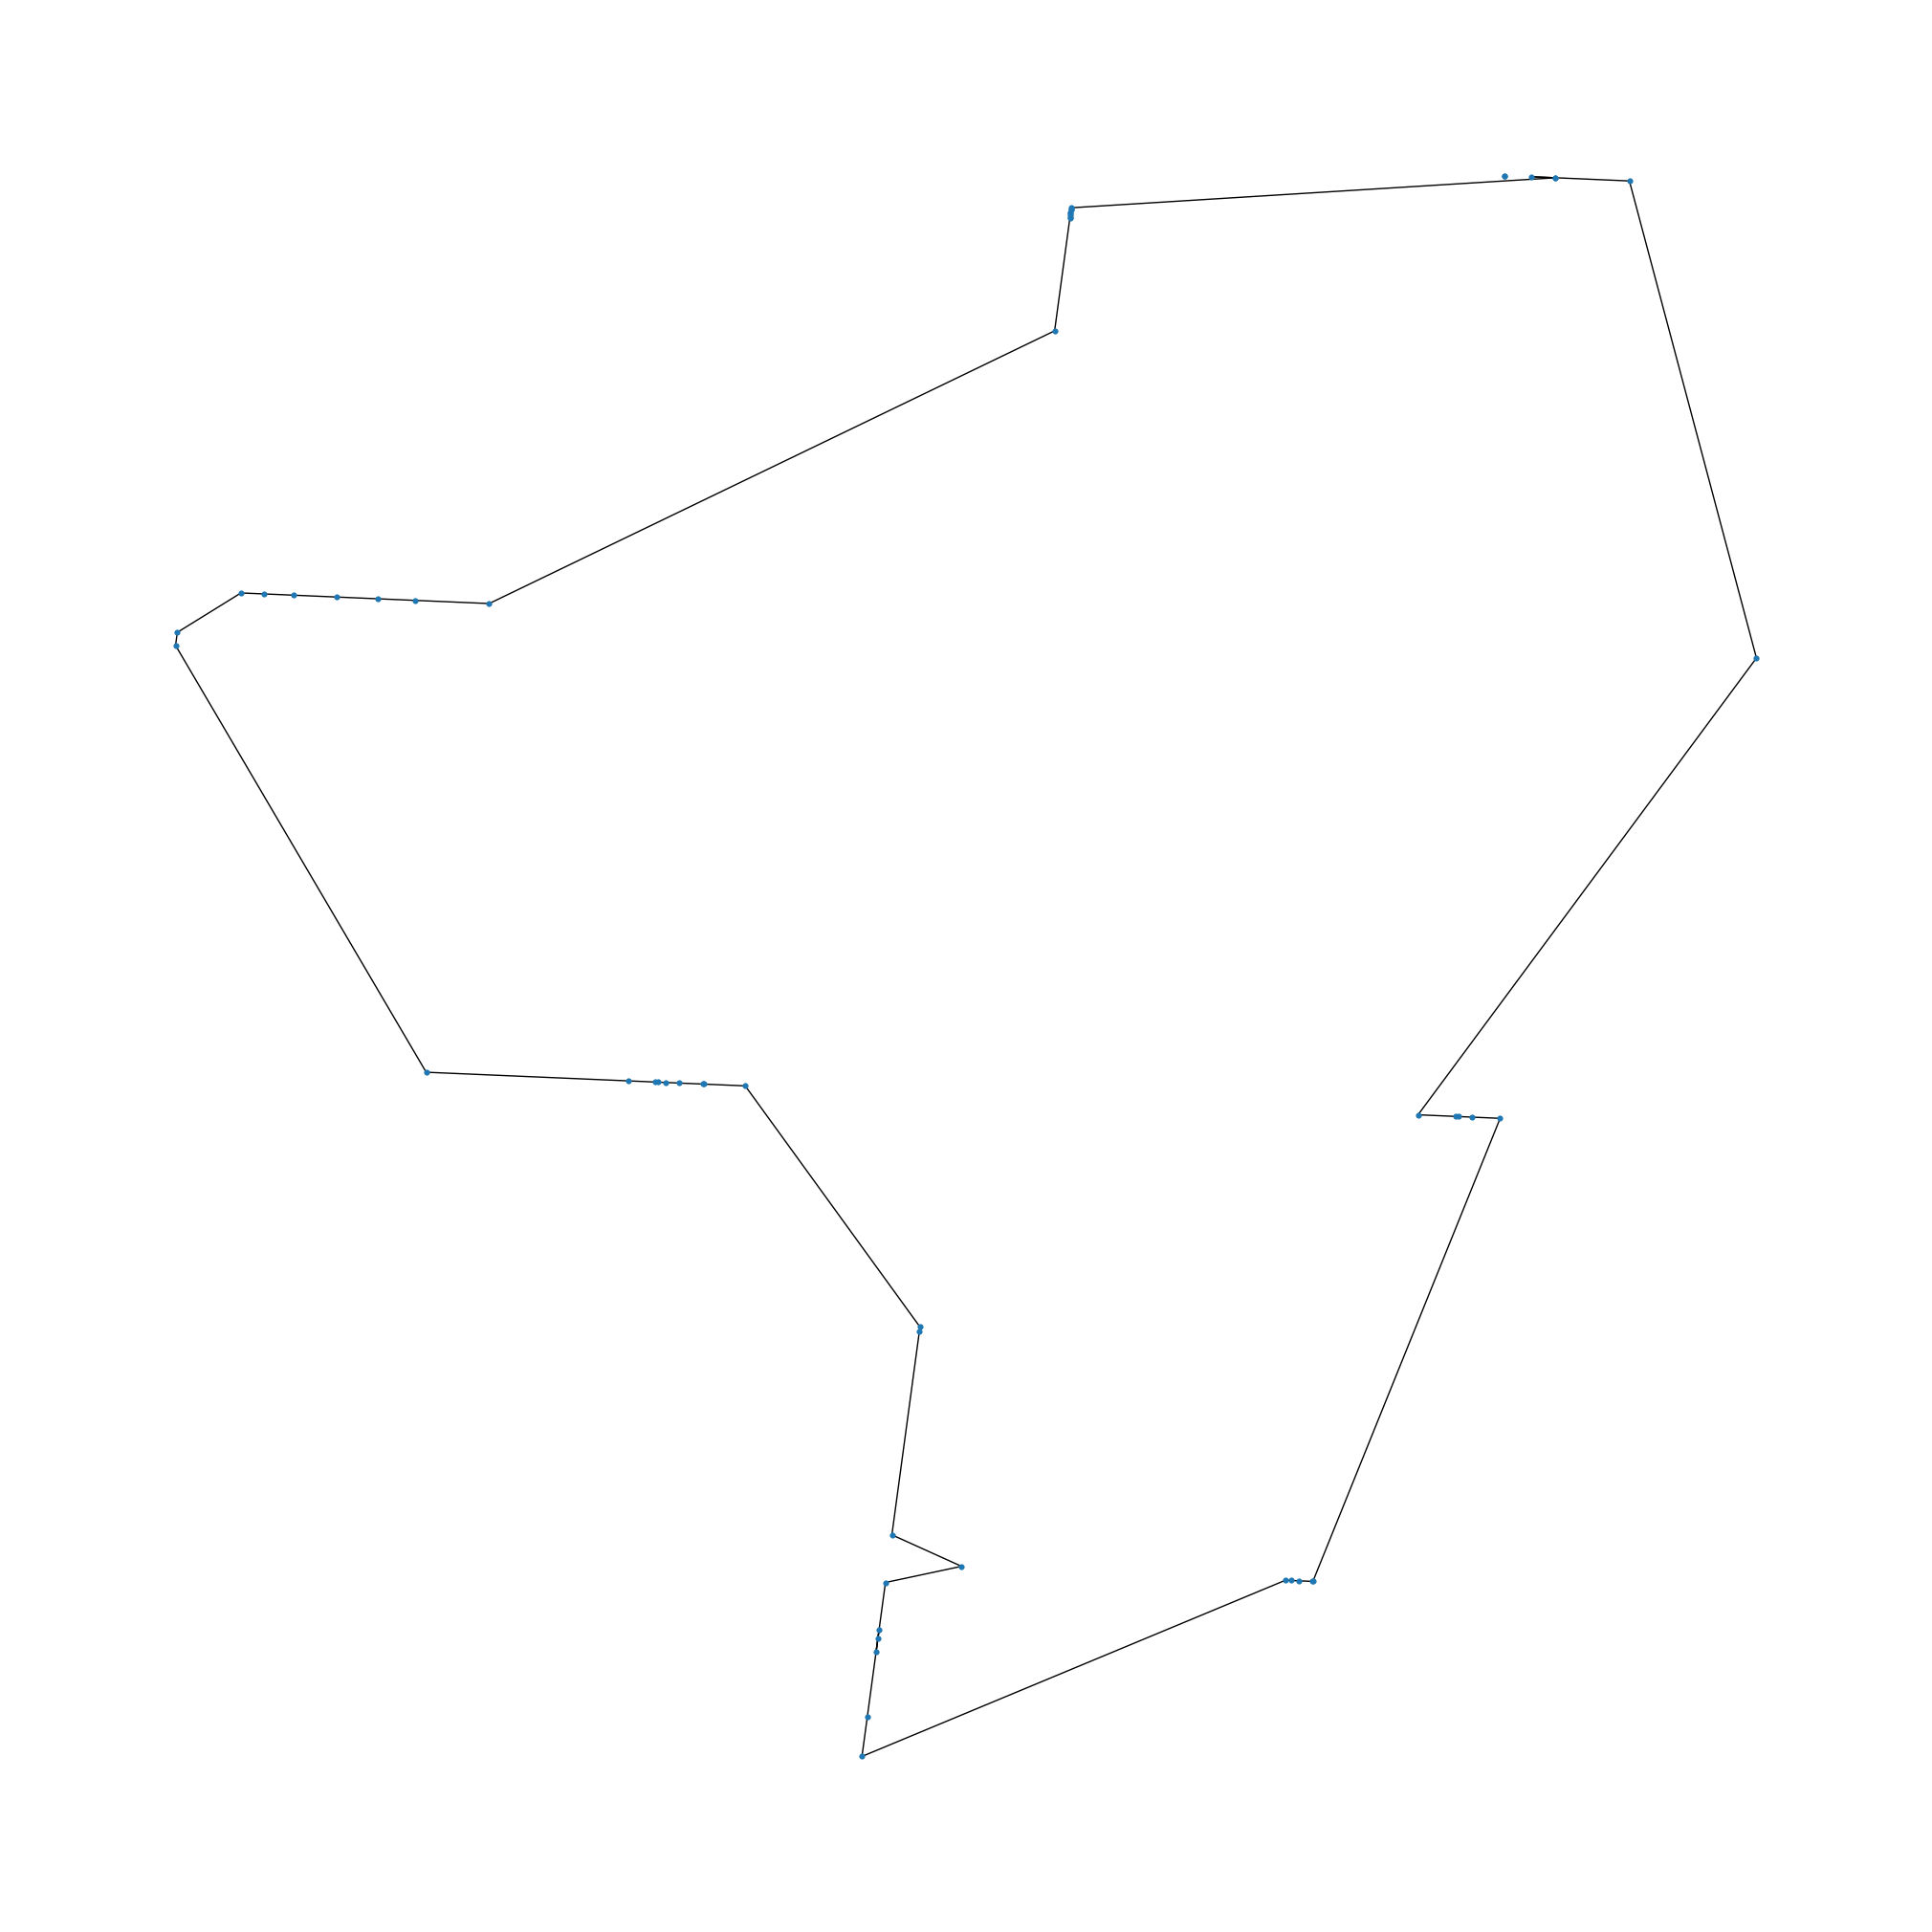

In [12]:
t1=time.time()
clean_graph(G_extremities)
remove_branch(G_extremities)

t2=time.time()
print(t2-t1)
nx.draw(G_extremities,pos=pos,node_size=10)

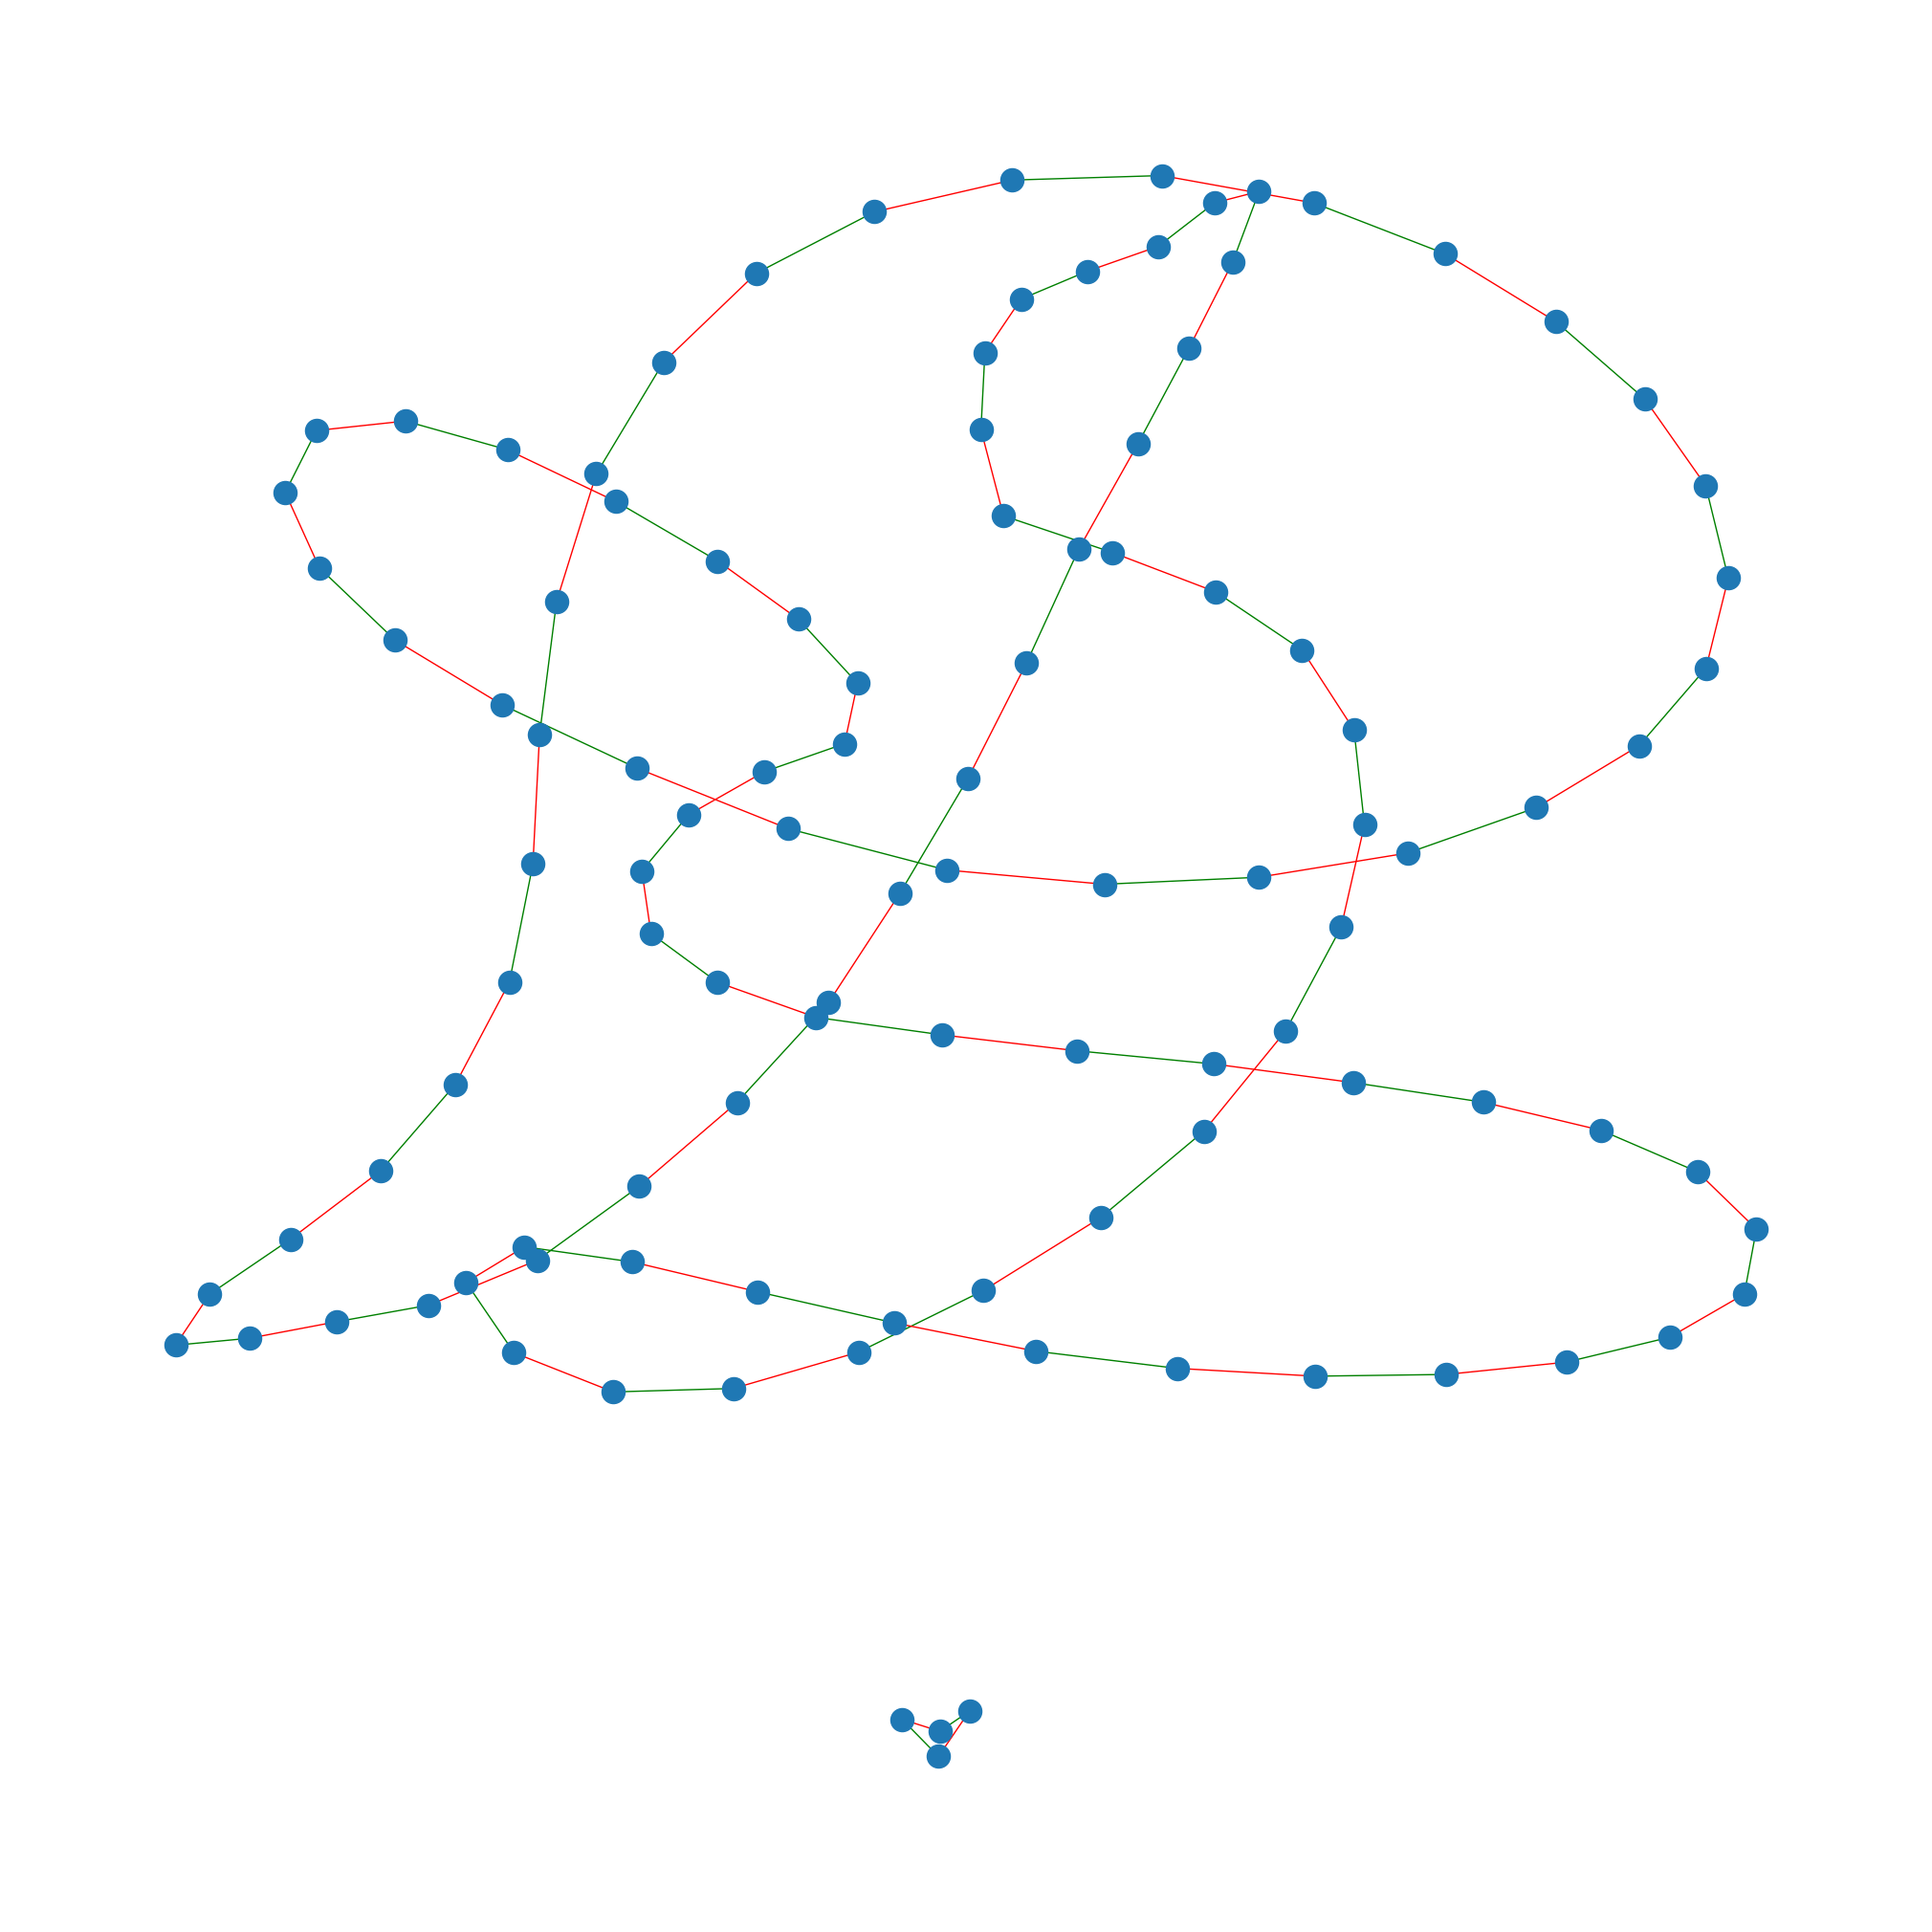

In [13]:
cycles,paths=cycle_chain_decomposition(G_extremities)

cycle_edges=[(cycle[i],cycle[i+1]) for cycle in cycles for i in range(len(cycle)-1)]
path_edges=cycle_edges+[(path[i],path[i+1]) for path in paths for i in range(len(path)-1)]
edge_color=[]
for u,v in G_extremities.edges():
    if (u,v) in path_edges or (v,u) in path_edges:
        if G_extremities.get_edge_data(u,v)['edge_type']=='contour':
            edge_color.append('r')
        else:
            edge_color.append('g')
    else:
        edge_color.append('k')
nx.draw(G_extremities,edge_color=edge_color)

0.8450958728790283


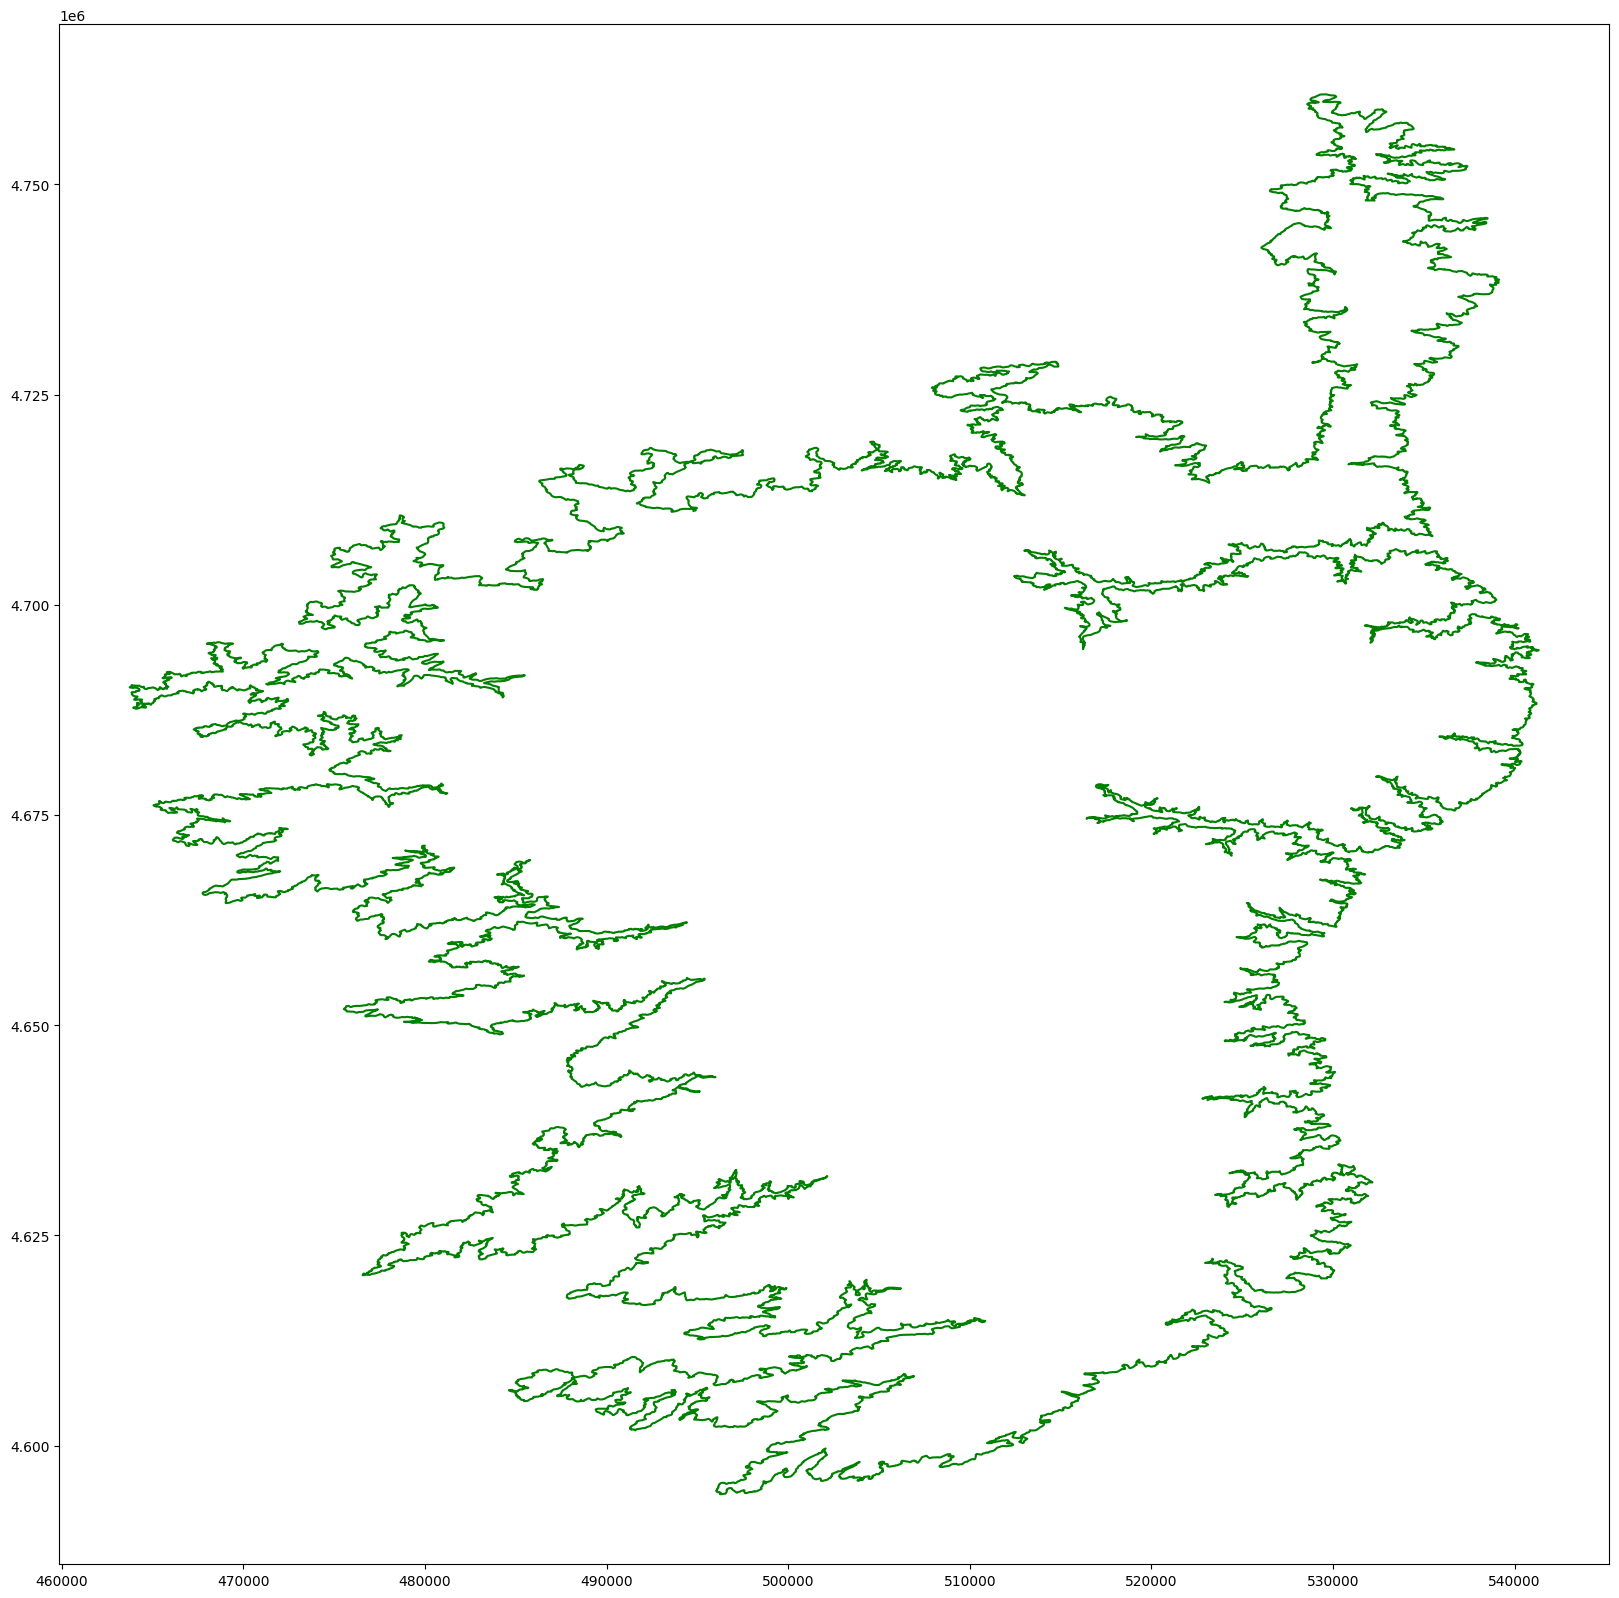

In [14]:
plt.rcParams['figure.figsize']=(20,20)
t1=time.time()
closed_contour_lines,open_contour_lines,merged_nodes=get_contour_lines_from_elevation_df(level_open_contours_df,max_distance=10)
t2=time.time()
print(t2-t1)
for ls in closed_contour_lines:
    coords=np.array(ls.coords)
    plt.plot(coords[:,0],coords[:,1],c='g')
for ls in open_contour_lines:
    coords=np.array(ls.coords)
    plt.plot(coords[:,0],coords[:,1],c='r')
